In [16]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from kmodes.kmodes import KModes

In [2]:
#reading in the data table, dropping extra column, and NaN values, adding Profit
#https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa

df = pd.read_csv('/Users/akanksharoy/Downloads/data.csv')
df = df.drop(['Column1','index','Date','Year'], axis=1).dropna()
df["Profit"] = df["Revenue"]-df["Cost"]
df.head()

,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit
0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,29.0
1,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,8.0
2,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,4.0
3,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,58.0
4,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,20.0


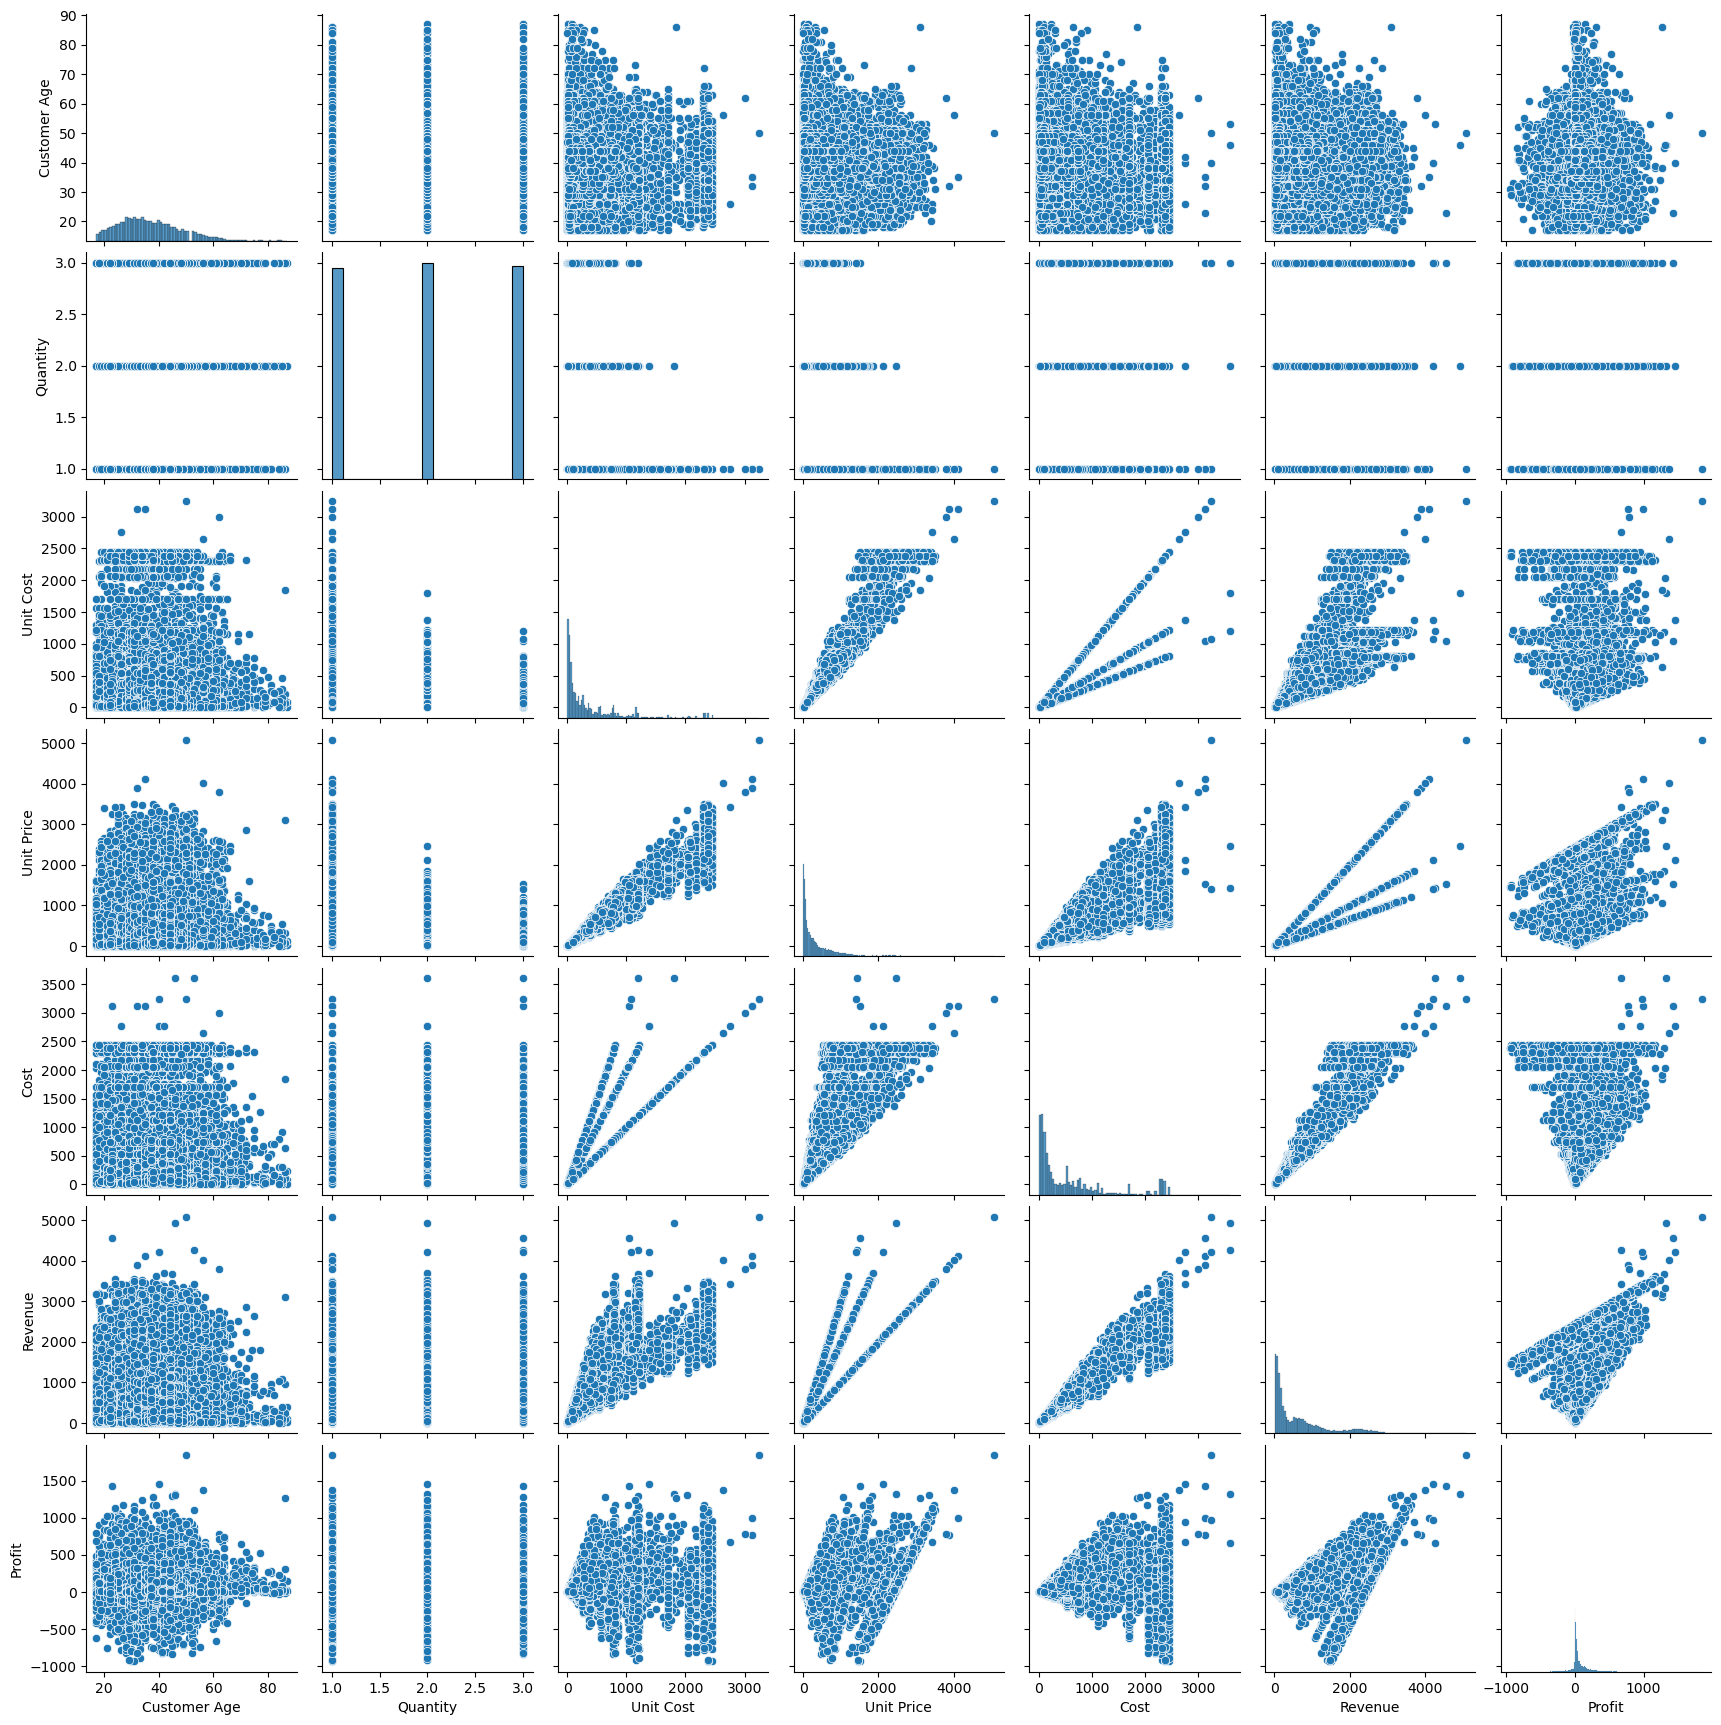

In [3]:
#creating line plots of all the numerical data in the table
#https://medium.com/analytics-vidhya/linear-regression-using-pandas-numpy-for-beginners-in-data-science-fe57157ed93d

sns.pairplot(data=df)

In [4]:
#creating a table with all the numerical data, and describing it

df_num = df[["Customer Age", "Quantity","Unit Cost","Unit Price","Cost","Revenue","Profit"]]
numerical_stats = df_num.describe()
print(numerical_stats)

       Customer Age      Quantity     Unit Cost    Unit Price          Cost  \
count  34866.000000  34866.000000  34866.000000  34866.000000  34866.000000   
mean      36.382895      2.002524    349.880567    389.232485    576.004532   
std       11.112902      0.813936    490.015846    525.319091    690.500395   
min       17.000000      1.000000      0.670000      0.666667      2.000000   
25%       28.000000      1.000000     45.000000     53.666667     85.000000   
50%       35.000000      2.000000    150.000000    179.000000    261.000000   
75%       44.000000      3.000000    455.000000    521.000000    769.000000   
max       87.000000      3.000000   3240.000000   5082.000000   3600.000000   

            Revenue        Profit  
count  34866.000000  34866.000000  
mean     640.870074     64.865542  
std      736.650597    152.879908  
min        2.000000   -937.000000  
25%      102.000000      5.000000  
50%      319.000000     27.000000  
75%      902.000000     96.000000  


In [5]:
#creating a table with all the categorical data, and describing it

df_cat = df[["Month","Customer Gender","Country","State","Product Category","Sub Category"]]
categorical_stats = df_cat.describe()
print(categorical_stats)
df_cat.head()

        Month Customer Gender        Country       State Product Category  \
count   34866           34866          34866       34866            34866   
unique     12               2              4          45                3   
top      June               M  United States  California      Accessories   
freq     3680           17805          18076       10332            22534   

           Sub Category  
count             34866  
unique               17  
top     Tires and Tubes  
freq              11112  


,Month,Customer Gender,Country,State,Product Category,Sub Category
0,February,F,United States,Washington,Accessories,Tires and Tubes
1,February,F,United States,Washington,Clothing,Gloves
2,February,F,United States,Washington,Accessories,Tires and Tubes
3,March,F,United States,Washington,Accessories,Tires and Tubes
4,March,F,United States,Washington,Accessories,Tires and Tubes


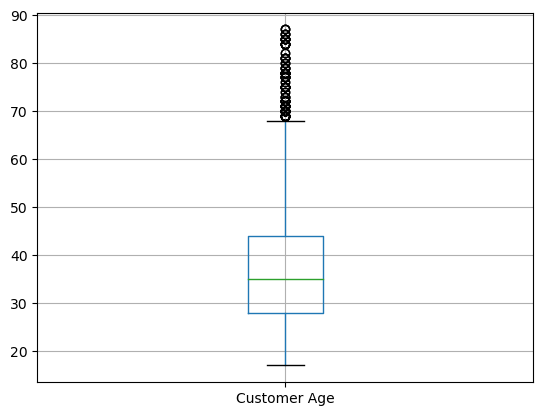

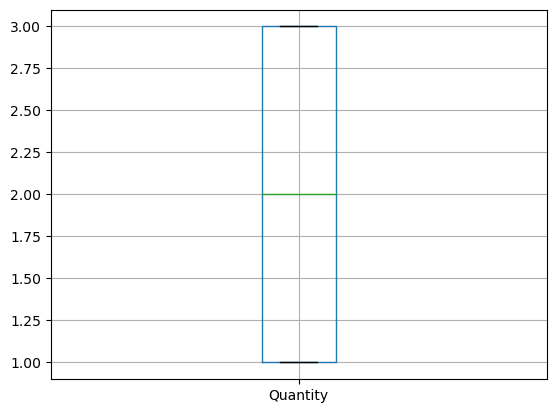

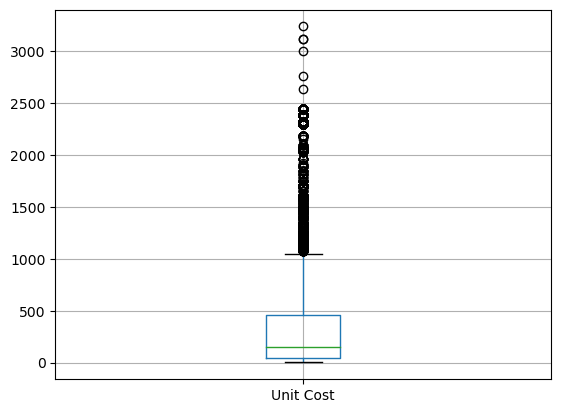

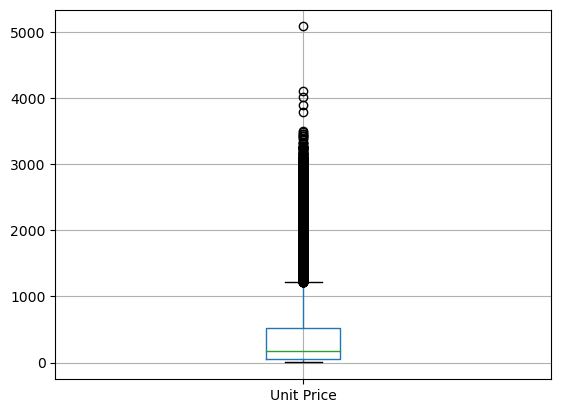

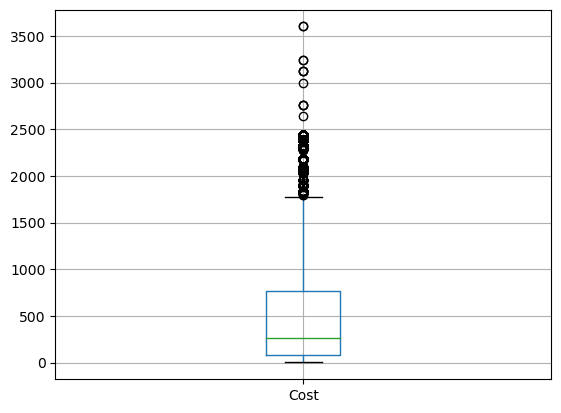

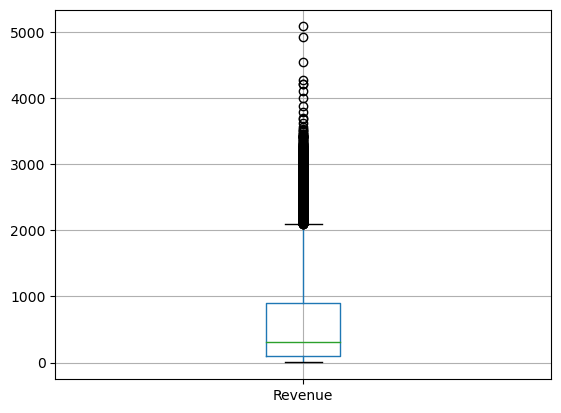

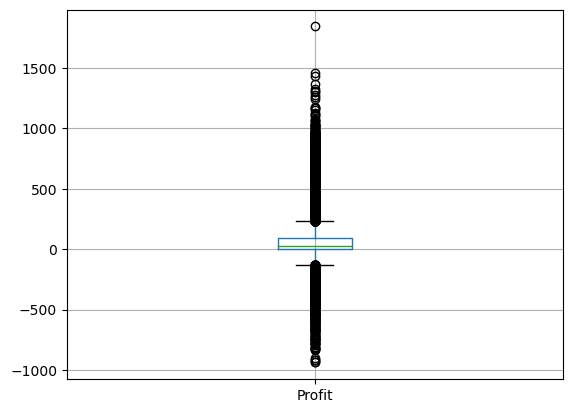

In [6]:
#boxplot of Customer Age and Quantity

for col in df_num:
    boxplot = df_num.boxplot(column=col)
    plt.show()

/var/folders/dt/mfk7l6kj25l9zm6v998pp24m0000gn/T/ipykernel_12520/3059592923.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num[col] < tenth, col] = tenth
/var/folders/dt/mfk7l6kj25l9zm6v998pp24m0000gn/T/ipykernel_12520/3059592923.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num[col] > nineth, col] = nineth


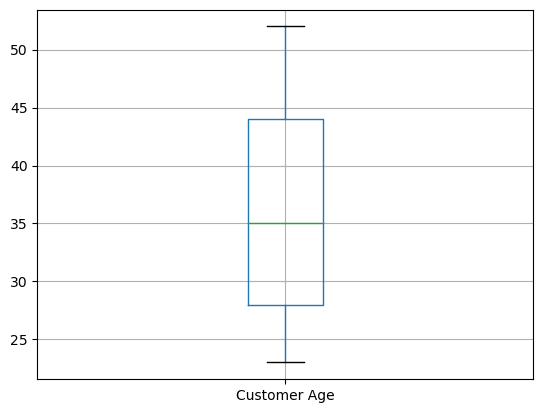

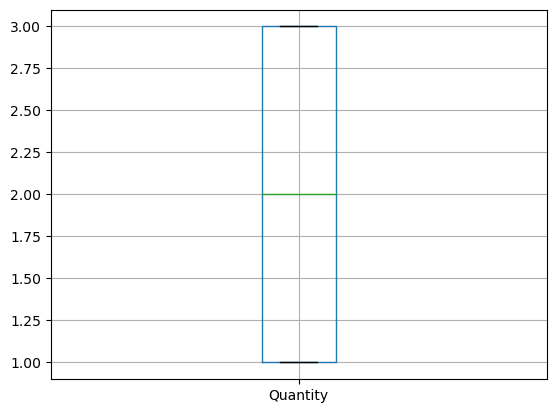

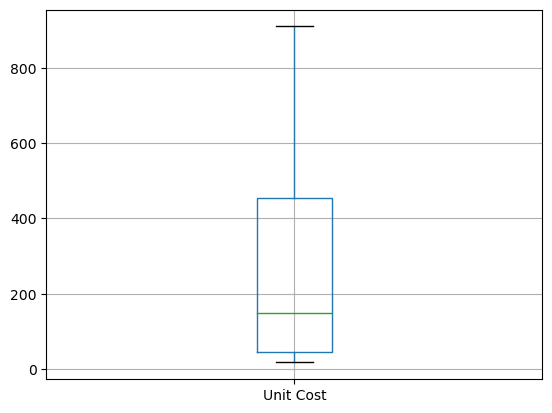

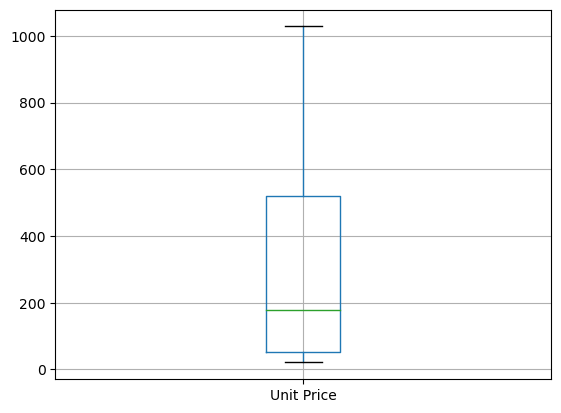

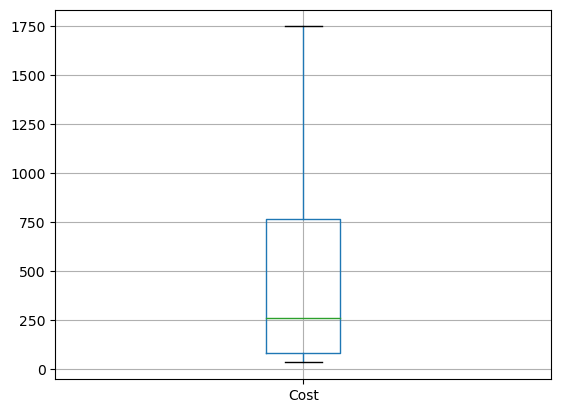

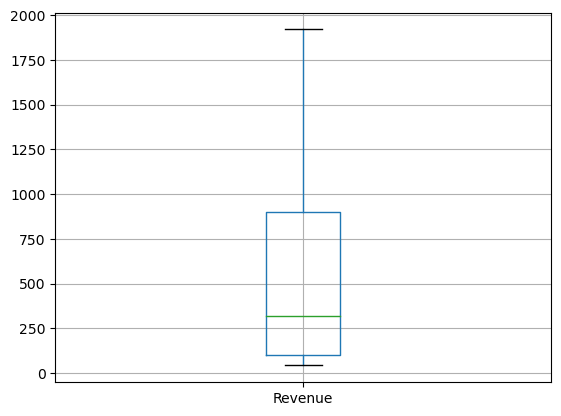

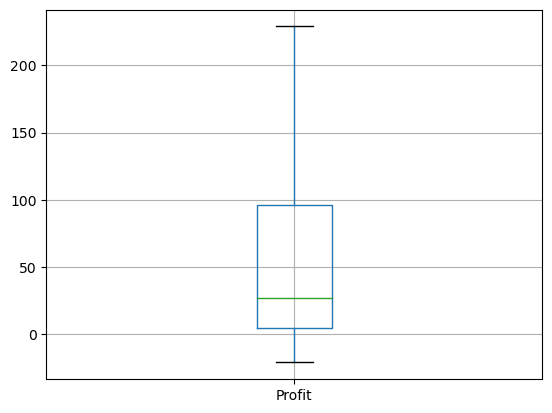

In [7]:
# Computing 10th, 90th percentiles and replacing the outliers for all the numerical data
#Recreating the boxplots from above

percentiles = pd.DataFrame()
ten_percentiles = {}
ninety_percentiles = {}
for col in list(df_num):
    ten_percentiles[col] = np.percentile(df_num.loc[:,col],10,axis=0)
    ninety_percentiles[col] = np.percentile(df_num.loc[:,col],90,axis=0)
    percentiles[col] = [ten_percentiles[col],ninety_percentiles[col]]

percentiles.head()

for col in list(df_num):
    tenth = percentiles[col].loc[percentiles.index[0]]
    nineth = percentiles[col].loc[percentiles.index[1]]
    vals = list(df_num.loc[:,col])
    for val in vals:
        df_num.loc[df_num[col] < tenth, col] = tenth
        df_num.loc[df_num[col] > nineth, col] = nineth
        
for col in df_num:
    boxplot = df_num.boxplot(column=col)
    plt.show()

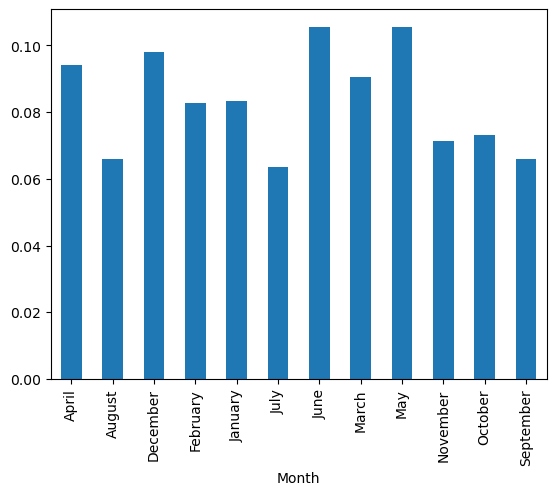

In [8]:
#Visualizing the frequency of Month
#https://www.kaggle.com/code/bhavikapanara/frequency-encoding

copy = df_cat.copy()

fq = (copy.groupby("Month").size()) / len(copy)
copy["Month encode"] = copy["Month"].apply(lambda x : fq[x])
copy = copy.drop(['Month'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

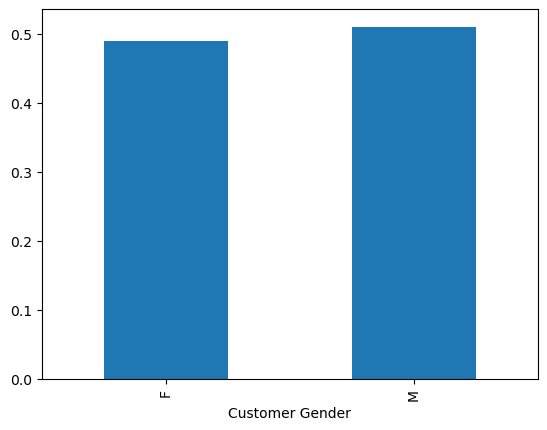

In [9]:
#Visualizing the frequency of Customer Gender

copy = df_cat.copy()

fq = (copy.groupby("Customer Gender").size()) / len(copy)
copy["Gender encode"] = copy["Customer Gender"].apply(lambda x : fq[x])
copy = copy.drop(['Customer Gender'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

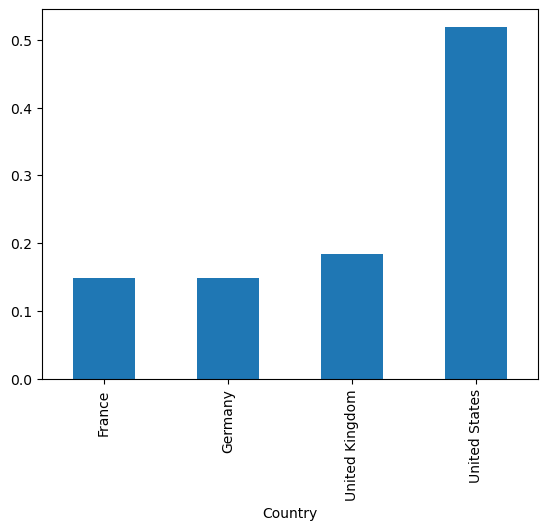

In [10]:
#Visualizing the frequency of Country

copy = df_cat.copy()

fq = (copy.groupby("Country").size()) / len(copy)
copy["Country encode"] = copy["Country"].apply(lambda x : fq[x])
copy = copy.drop(['Country'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

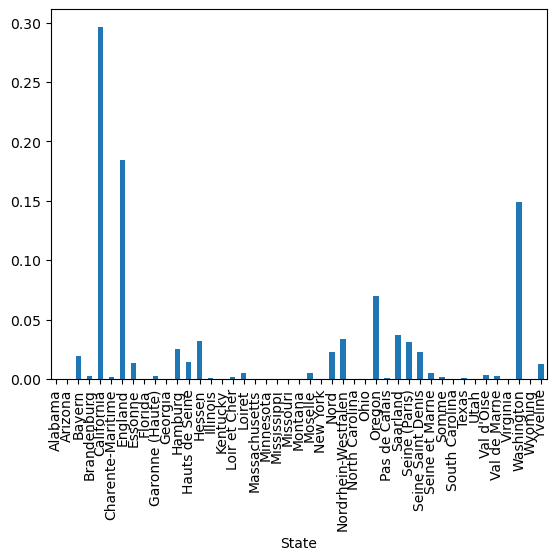

In [11]:
#Visualizing the frequency of State

copy = df_cat.copy()

fq = (copy.groupby("State").size()) / len(copy)
copy["State encode"] = copy["State"].apply(lambda x : fq[x])
copy = copy.drop(['State'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

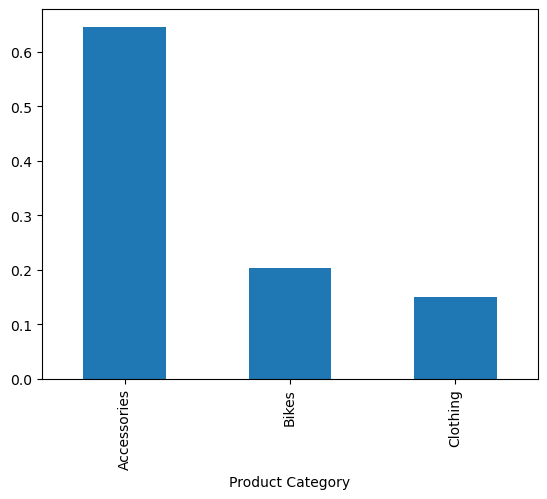

In [12]:
#Visualizing the frequency of Product Category

copy = df_cat.copy()

fq = (copy.groupby("Product Category").size()) / len(copy)
copy["Product Category encode"] = copy["Product Category"].apply(lambda x : fq[x])
copy = copy.drop(['Product Category'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

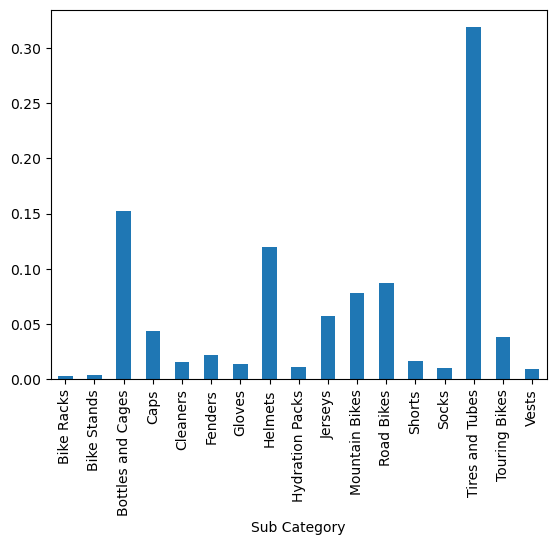

In [13]:
#Visualizing the frequency of (Product) Sub Category

copy = df_cat.copy()

fq = (copy.groupby("Sub Category").size()) / len(copy)
copy["Sub Category encode"] = copy["Sub Category"].apply(lambda x : fq[x])
copy = copy.drop(['Sub Category'], axis=1)
fq.plot.bar(stacked=True)
plt.show()

In [14]:
#performing Chi Square Independence Test between Country and Sub Category

compare = pd.crosstab(df_cat['Country'],df_cat['Sub Category'])
chi2, p, dof, ex = stats.chi2_contingency(compare)
print(f'Chi_square value {chi2}, p value {p}, degrees of freedom {dof}, expected {ex}')

#Since the p-value < 0.05, the Country and Sub Category are not independent so we can cluster them

Chi_square value 699.0365346432127, p value 2.1034262221572546e-116, degrees of freedom 48, expected [[  15.26713704   21.49257156  784.84942351  224.8567659    80.78242414
   112.94716916   71.14782309  618.98606092   58.69695405  296.44926289
   405.69081627  447.93483623   83.8951414    53.95376585 1647.07210463
   197.73165835   46.24608501]
 [  15.36462456   21.62981128  789.86103941  226.2925773    81.29825618
   113.66838754   71.60213388  622.93856479   59.07176045  298.34222452
   408.28133425  450.79510124   84.43084954   54.29828486 1657.58939941
   198.99426375   46.54138702]
 [  18.96870877   26.70352206  975.13896059  279.37408937  100.36841049
   140.33161246   88.39786612  769.06143521   72.92823955  368.32444215
   504.05199908  556.53823209  104.23581713   67.03504847 2046.41060059
   245.67240291   57.45861298]
 [  53.39952963   75.17409511 2745.15057649  786.47656743  282.5509092
   395.05283084  248.85217691 2165.01393908  205.30304595 1036.88407044
  1418.9758504 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 125657.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 125657.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1729, cost: 108797.0
Run 1, iteration: 2/100, moves: 0, cost: 108797.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3249, cost: 108913.0
Run 2, itera

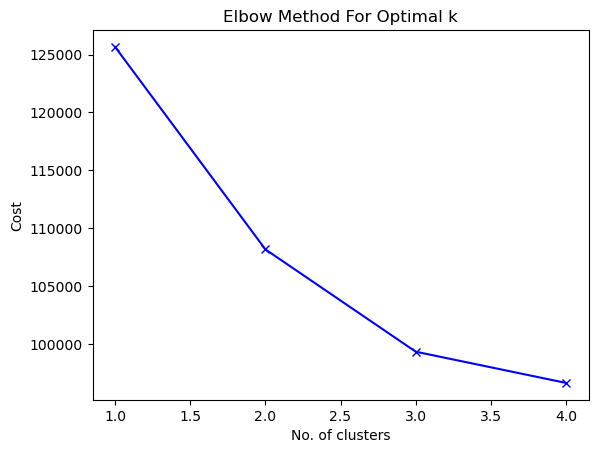

In [17]:
#Finding optimal number of clusters for Categorical Data
#https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/ 

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_cat)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
#Training model with optimal number of clusters

kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_cat)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2656, cost: 112658.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12968, cost: 101106.0
Run 2, iteration: 2/100, moves: 2131, cost: 101106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 924, cost: 103328.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9815, cost: 99704.0
Run 4, iteration: 2/100, moves: 3189, cost: 99704.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3688, cost: 104315.0
Run 5, iteration: 2/100, moves: 7764, cost: 103817.0
Run 5, iteration: 3/100, moves: 602, cost: 103817.0
Best run was number 4


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [19]:
#adding cluster to categorical data table
df_cat = df[["Month","Customer Gender","Country","State","Product Category","Sub Category"]]
df_cat.insert(0, "Cluster", clusters, True)
df_cat.head()

,Cluster,Month,Customer Gender,Country,State,Product Category,Sub Category
0,0,February,F,United States,Washington,Accessories,Tires and Tubes
1,0,February,F,United States,Washington,Clothing,Gloves
2,0,February,F,United States,Washington,Accessories,Tires and Tubes
3,0,March,F,United States,Washington,Accessories,Tires and Tubes
4,0,March,F,United States,Washington,Accessories,Tires and Tubes


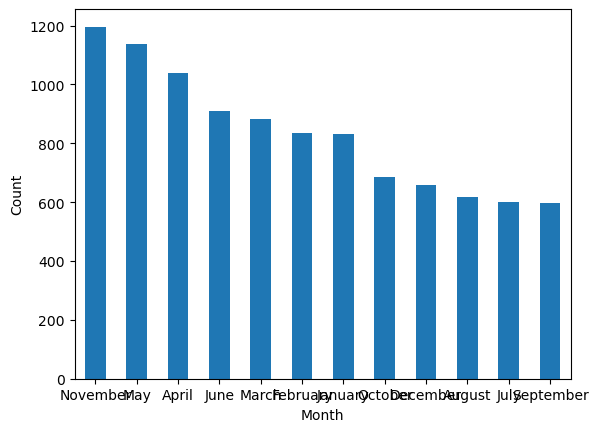

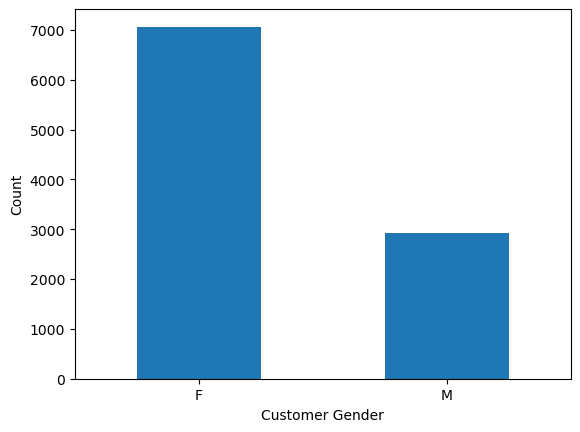

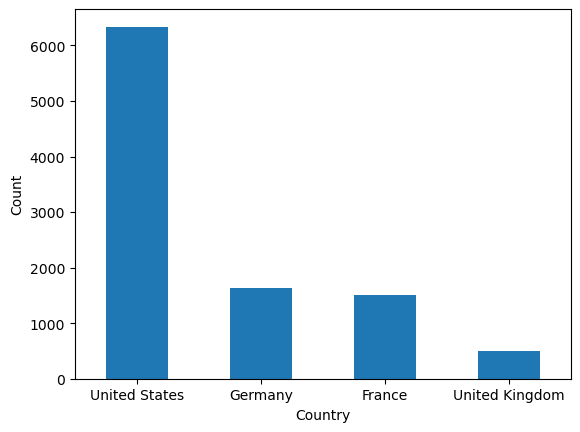

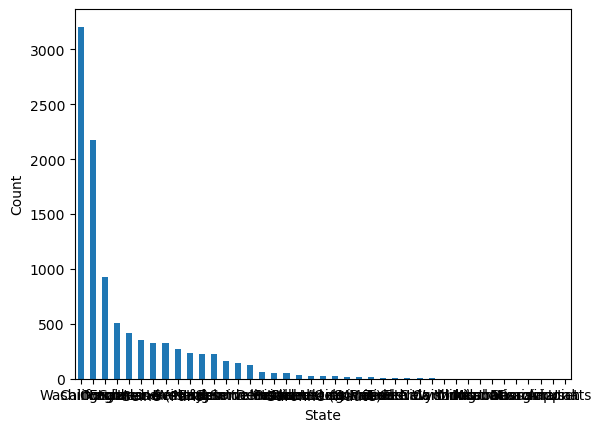

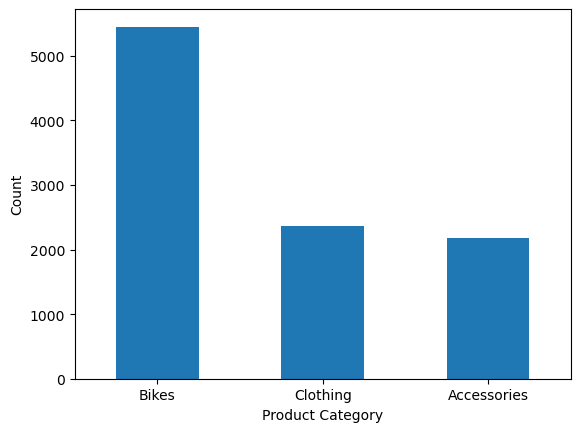

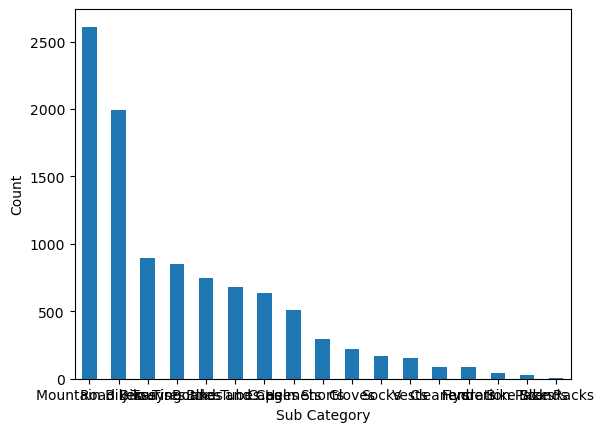

Month  Customer Gender  Country  State
Product Category Sub Category                                             
Bikes            Mountain Bikes      2610             2610     2610   2610
                 Road Bikes          1991             1991     1991   1991
Clothing         Jerseys              893              893      893    893
Bikes            Touring Bikes        849              849      849    849
Accessories      Tires and Tubes      747              747      747    747
                 Bottles and Cages    677              677      677    677
Clothing         Caps                 636              636      636    636
Accessories      Helmets              510              510      510    510
Clothing         Shorts               297              297      297    297
                 Gloves               221              221      221    221
                 Socks                165              165      165    165
                 Vests                151              151      151    151
Accessories      Cleaners              88               88       88     88
                 Fenders               85               85       85     85
                 Hydration Packs       40               40       40     40
                 Bike Stands           24               24       24     24
                 Bike Racks             4                4        4      4

In [20]:
#creating dataframe for each cluster and making bar charts for the categories in them

cluster_0 = df_cat.loc[df_cat["Cluster"]==0].drop(["Cluster"],axis=1)
for col in cluster_0:
    cluster_0[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_0.groupby(["Product Category", "Sub Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 0, we can see that the most popular product under Bikes, Sub Category Mountain Bikes.
#This is the most popular category among women in the United States, buying mainly in November.

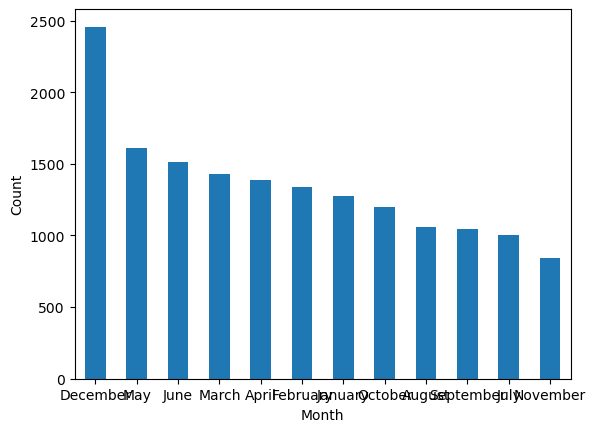

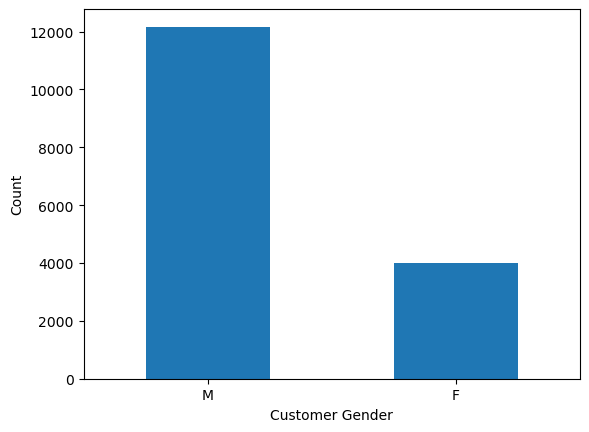

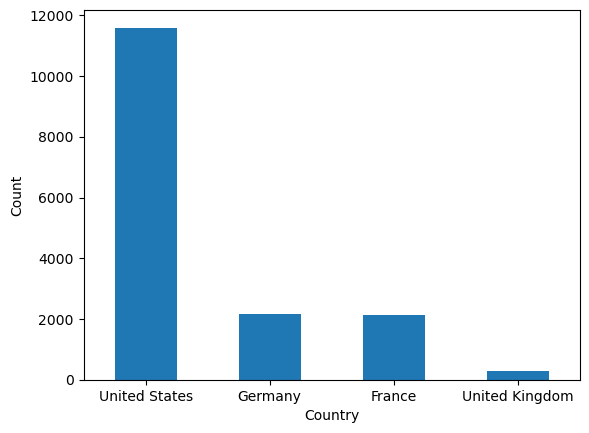

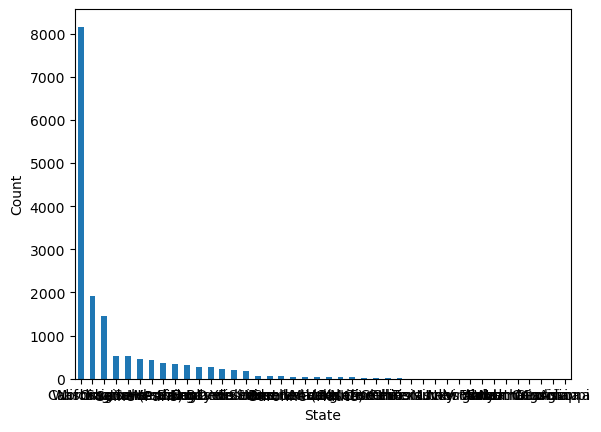

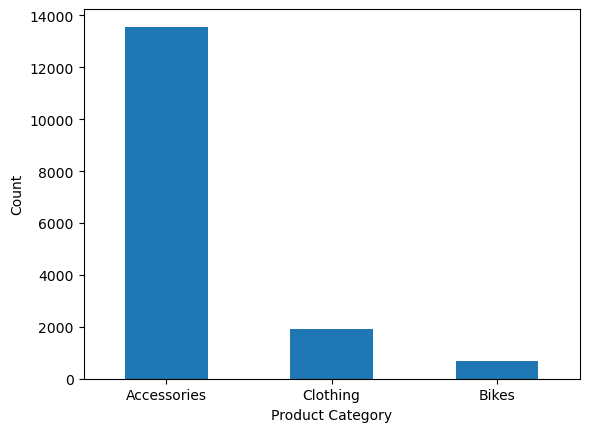

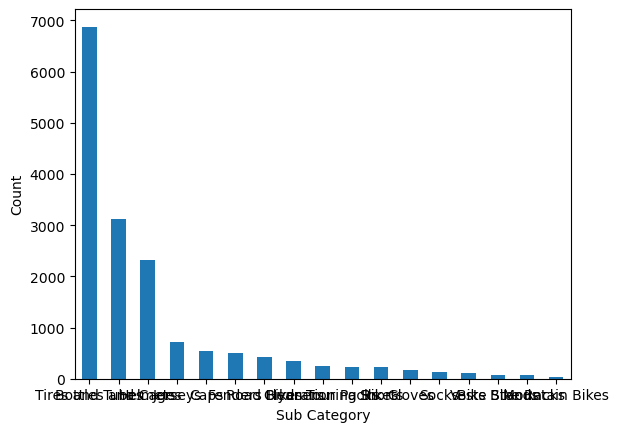

Month  Customer Gender  Country  State
Product Category Sub Category                                             
Accessories      Tires and Tubes     6878             6878     6878   6878
                 Bottles and Cages   3128             3128     3128   3128
                 Helmets             2314             2314     2314   2314
Clothing         Jerseys              725              725      725    725
                 Caps                 538              538      538    538
Accessories      Fenders              507              507      507    507
Bikes            Road Bikes           424              424      424    424
Accessories      Cleaners             340              340      340    340
                 Hydration Packs      256              256      256    256
Bikes            Touring Bikes        222              222      222    222
Clothing         Shorts               220              220      220    220
                 Gloves               176              176      176    176
                 Socks                132              132      132    132
                 Vests                119              119      119    119
Accessories      Bike Stands           76               76       76     76
                 Bike Racks            68               68       68     68
Bikes            Mountain Bikes        42               42       42     42

In [22]:
cluster_1 = df_cat.loc[df_cat["Cluster"]==1].drop(["Cluster"],axis=1)
for col in cluster_1:
    cluster_1[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_1.groupby(["Product Category", "Sub Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 1, we can see that the most popular product under Accessories, Sub Category Tires and Tubes.
#This is the most popular category among men in the United Kingdom, buying mainly in December.

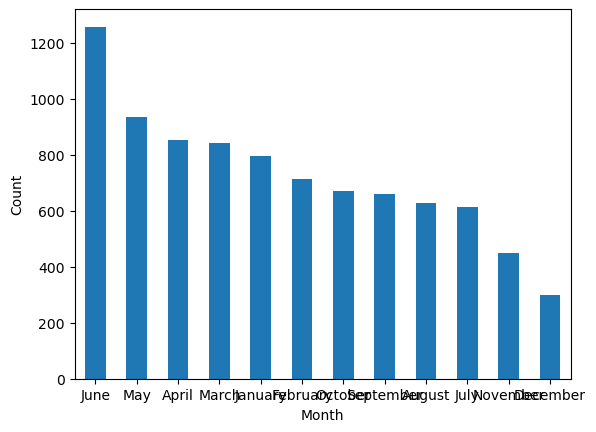

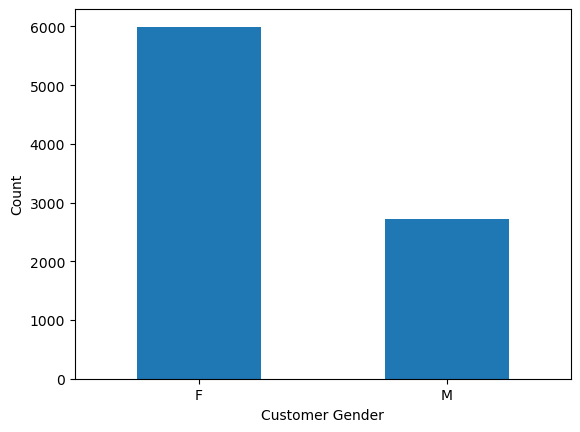

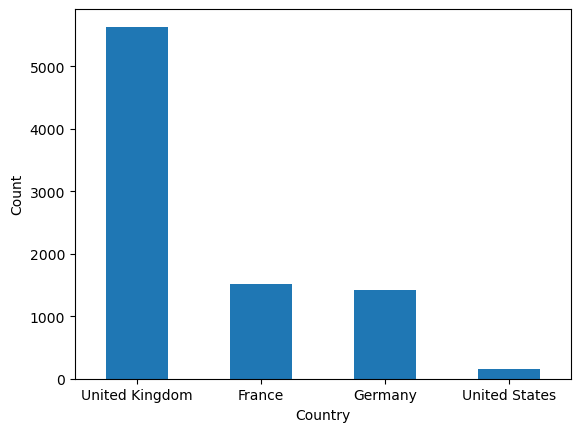

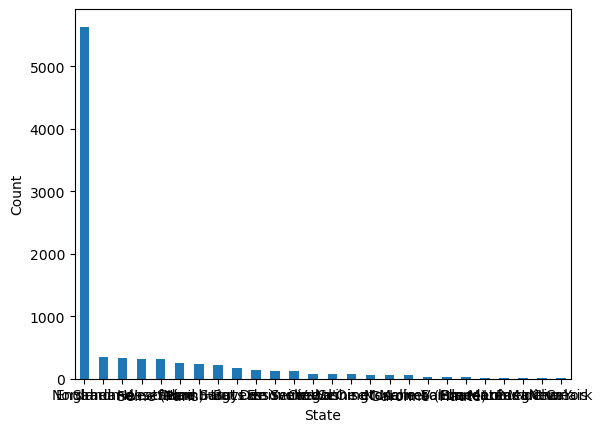

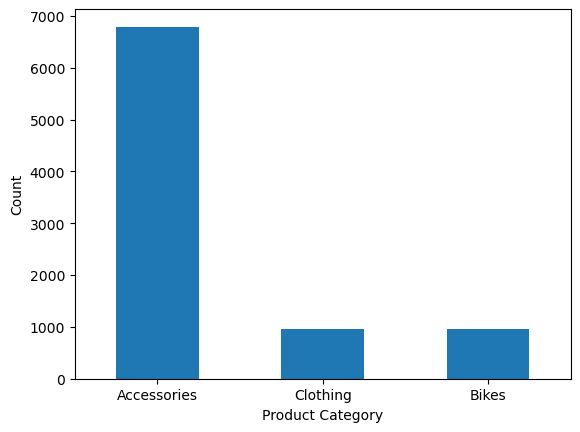

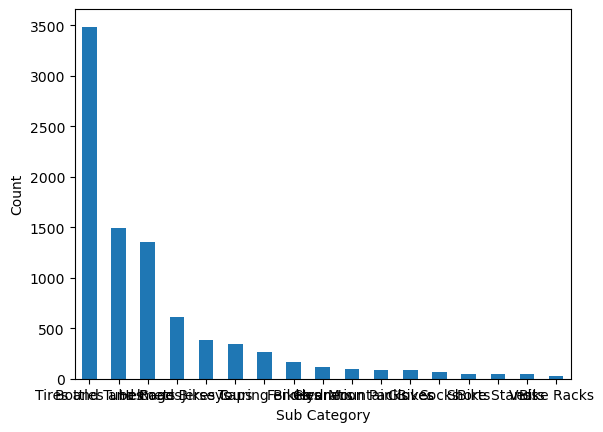

Month  Customer Gender  Country  State
Product Category Sub Category                                             
Accessories      Tires and Tubes     3487             3487     3487   3487
                 Bottles and Cages   1490             1490     1490   1490
                 Helmets             1352             1352     1352   1352
Bikes            Road Bikes           607              607      607    607
Clothing         Jerseys              382              382      382    382
                 Caps                 343              343      343    343
Bikes            Touring Bikes        263              263      263    263
Accessories      Fenders              170              170      170    170
                 Cleaners             117              117      117    117
                 Hydration Packs      100              100      100    100
Bikes            Mountain Bikes        85               85       85     85
Clothing         Gloves                83               83       83     83
                 Socks                 67               67       67     67
                 Shorts                49               49       49     49
Accessories      Bike Stands           45               45       45     45
Clothing         Vests                 42               42       42     42
Accessories      Bike Racks            31               31       31     31

In [23]:
cluster_2 = df_cat.loc[df_cat["Cluster"]==2].drop(["Cluster"],axis=1)
for col in cluster_2:
    cluster_2[col].value_counts().plot(kind='bar', xlabel=col, ylabel='Count', rot=0)
    plt.show()
cluster_2.groupby(["Product Category", "Sub Category"]).count().sort_values(by=['Month'], ascending=False)

#In cluster 2, we can see that the most popular product under Accessories, Sub Category Tires and Tubes.
#This is the most popular category among women in the United Kingdom, buying mainly in June.

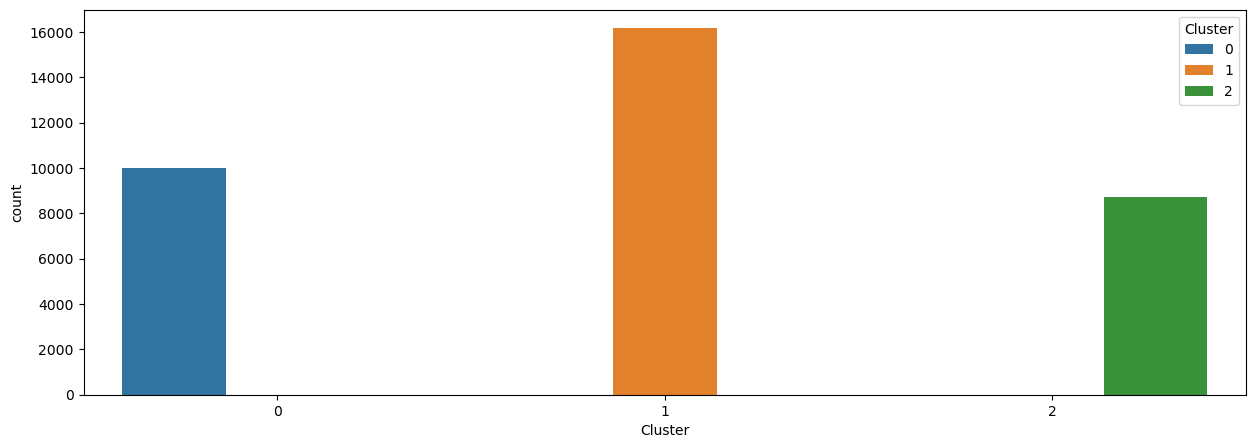

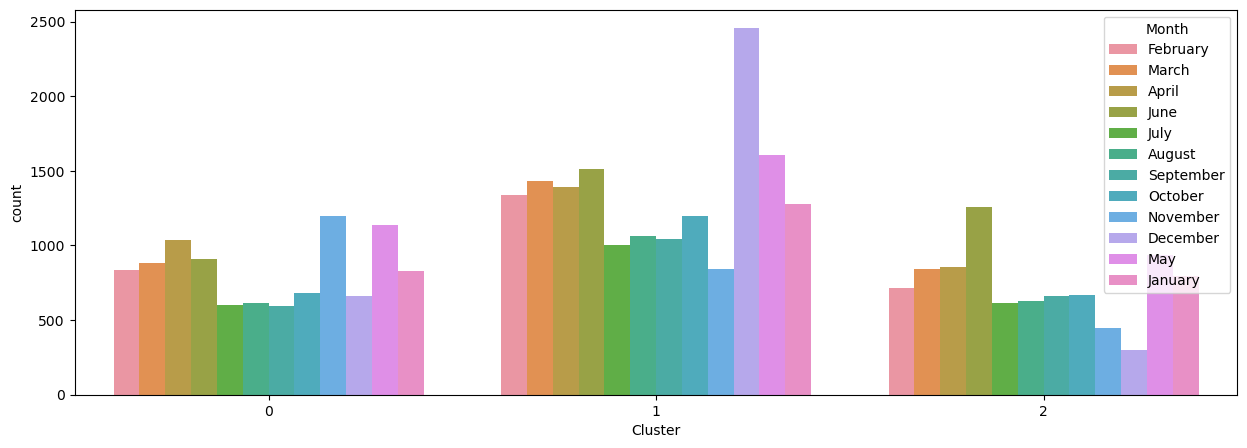

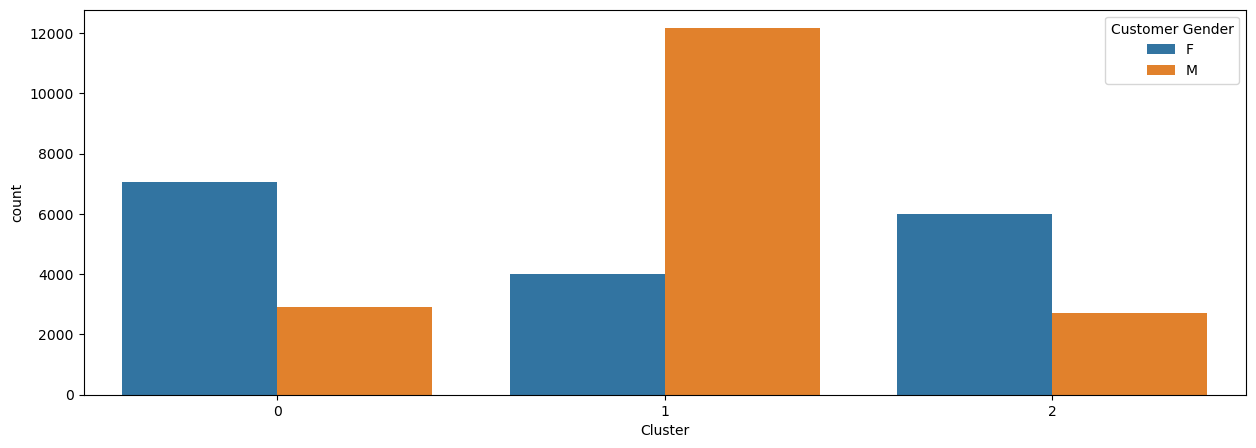

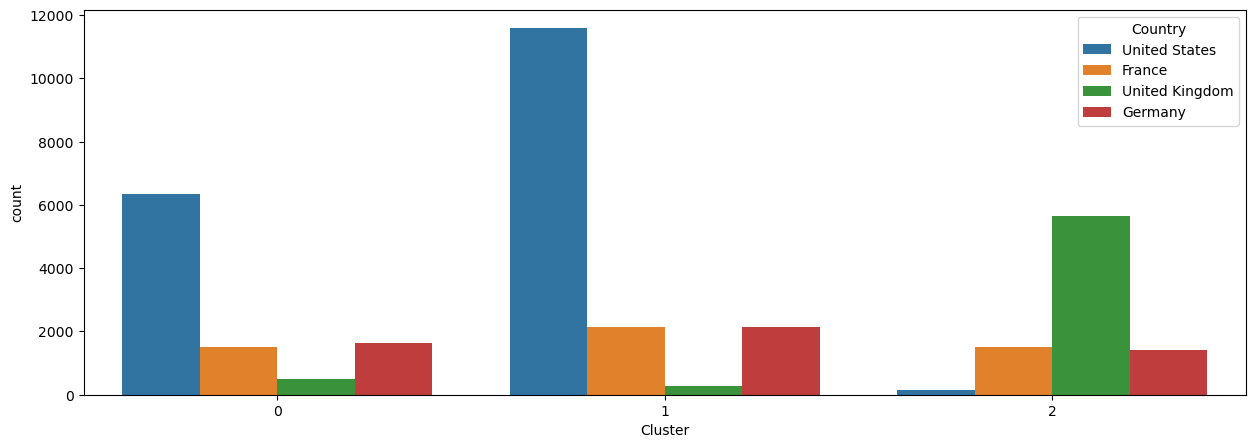

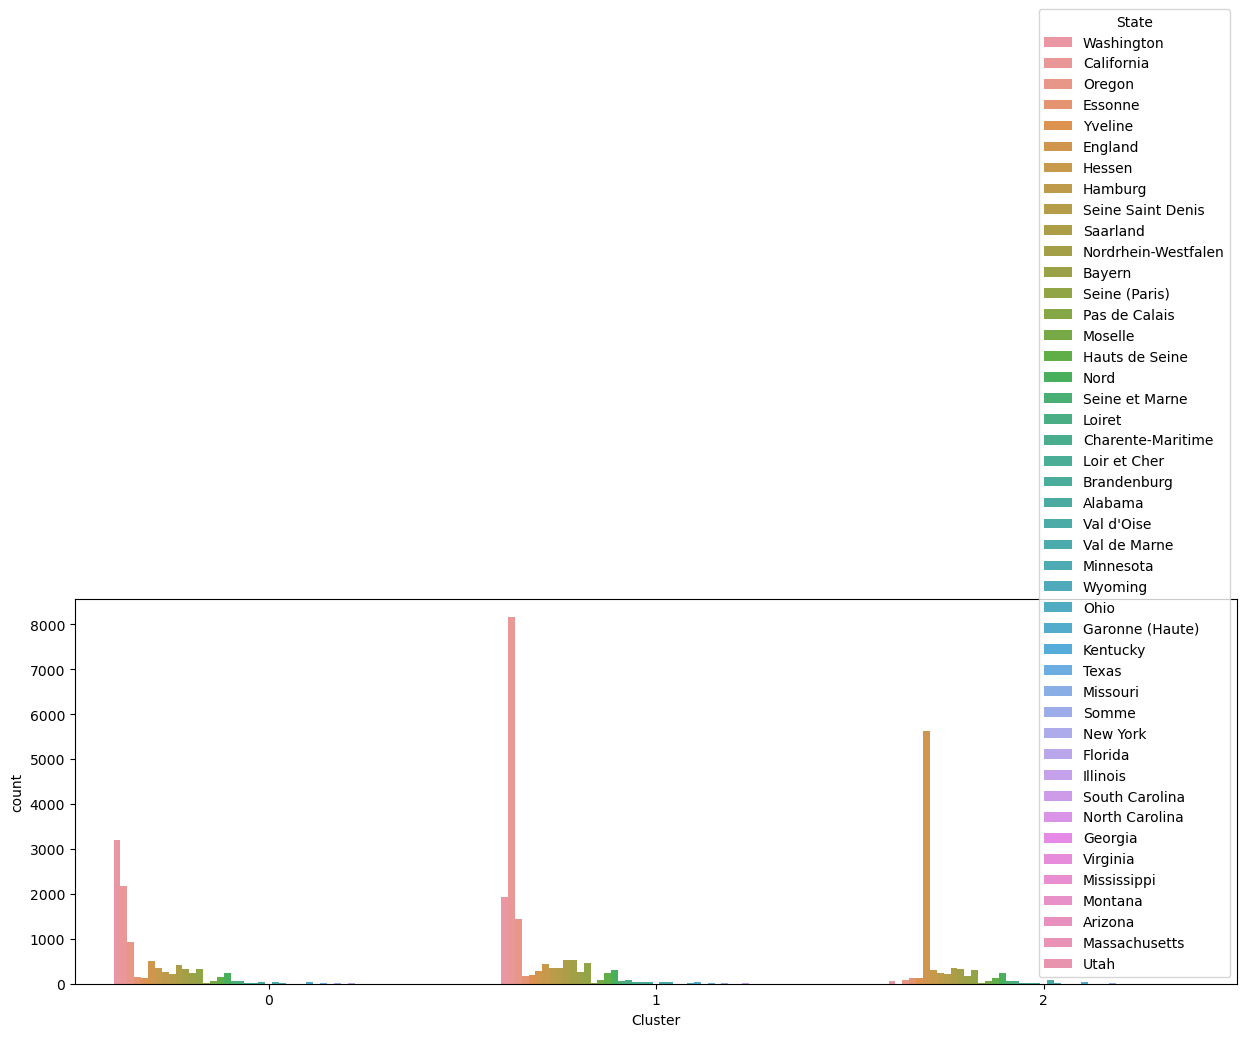

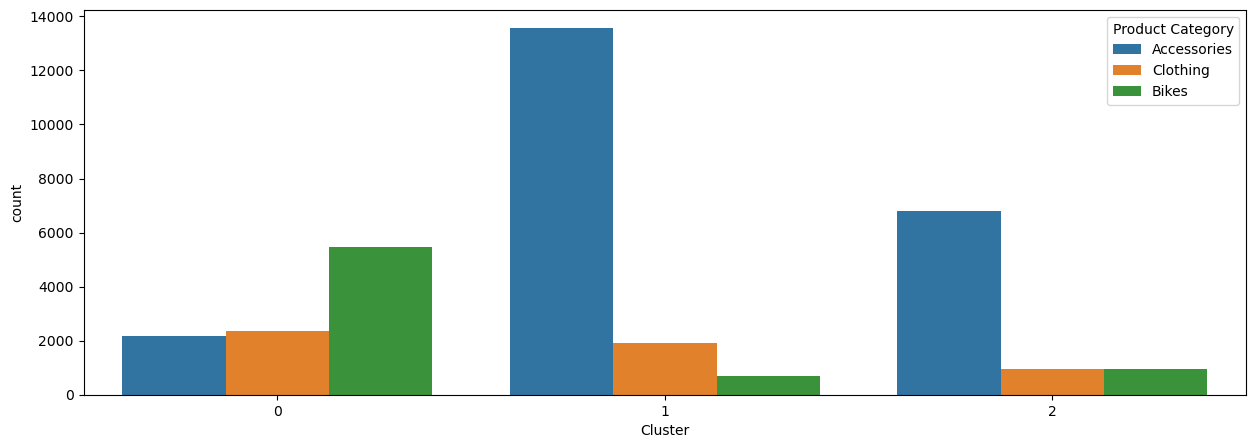

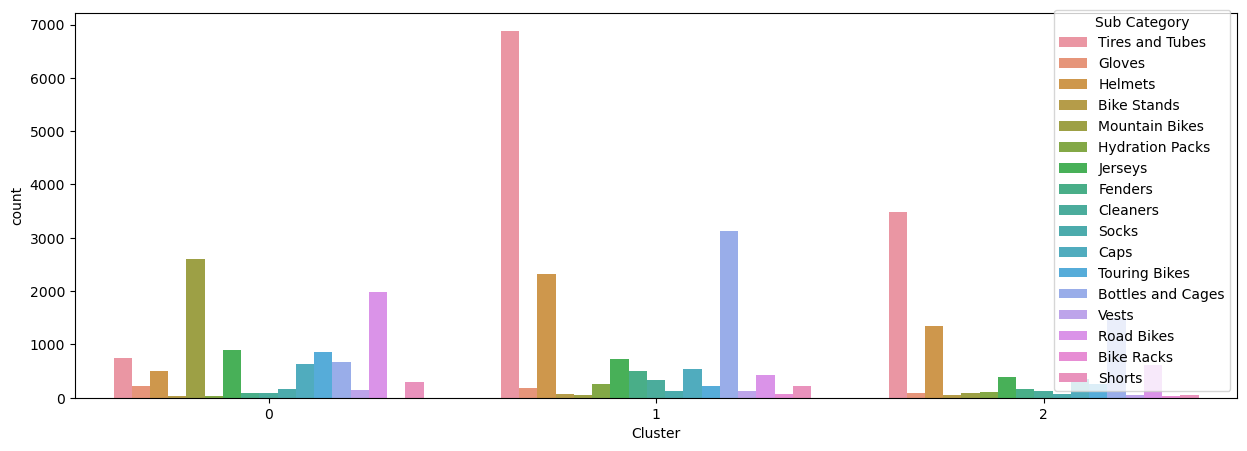

In [24]:
#making bar charts for clusters in each category

for col in df_cat:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='Cluster',hue=col, data = df_cat)
    plt.show()

In [ ]:
#Some Thoughts
#I know we wanted to look at how paramters like Age would affect Category/Sub Category, but I haven't found a way to 
#analyze numerical and categorical data. Does anyone have any ideas? I know Adam did some work by dividng the age into 
#different bins, but I was wondering if we could do anything beyond that?

#As for analzying age and revenue/profit, based on the line plots in the third block, there doesn't seem to be a
#realtion between them. Maybe we could try the age bins with them as well?